In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split

%matplotlib inline

sns.set_style("white", {'axes.edgecolor': '#EAEAF2'})
sns.set_context("notebook", font_scale=1.25) 


## Field list from data source site

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [2]:
cars_original = pd.read_csv('imports-85.data')

In [3]:
cars_original.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Looks like the data has no header row.  The column names pandas chose are actually data from the first entry.

In [4]:
columns = ['symboling', 'normalized_losses', 'make',
           'fuel-type', 'aspiration', 'num-of-doors',
           'body-style', 'drive-wheels', 'engine-location',
           'wheel-base', 'length', 'width',
           'height', 'curb-weight', 'engine-type',
           'num-of-cylinders', 'engine-size', 'fuel-system',
           'bore', 'stroke', 'compression-ratio',
           'horsepower', 'peak-rpm', 'city-mpg',
           'highway-mpg', 'price']

In [5]:
cars_original = pd.read_csv('imports-85.data', names=columns, header=None)

In [6]:
pd.set_option('display.max_columns', 26)

In [7]:
cars_original.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The target prediction column is: **price**

The following columns look like numerical and ordinal candidates for use as parameters:

- normalized_losses
- wheel-base
- length
- width
- height
- curb-weight
- num-of-cylinders
- engine-size
- bore
- stroke
- compression-ratio
- horsepower
- peak-rpm
- city-mpg
- highway-mpg

In [8]:
keep_columns = ['normalized_losses',
                'wheel-base',
                'length',
                'width',
                'height',
                'curb-weight',
                'num-of-cylinders',
                'engine-size',
                'bore',
                'stroke',
                'compression-ratio',
                'horsepower',
                'peak-rpm',
                'city-mpg',
                'highway-mpg',
                'price']

In [9]:
cars = cars_original[keep_columns]

In [10]:
cars.head()

,normalized_losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450


The **normalized_losses** column has question marks instead of null values.  Let's replace question marks with NaN throughout the data frame.

In [11]:
cars = cars.replace('?', np.nan)

Now lets see where things are regarding the data types for the columns:

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
normalized_losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 25.7+ KB


The **num-of-cylinders** column contains words for numbers rather than numbers.  Let's see what words are used:

In [13]:
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

Not that many distinct values. Let's whip up a quick dictionary for substitution.

In [14]:
num_dict = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'twelve': 12, 'three': 3}

In [15]:
cars['num-of-cylinders'] = cars['num-of-cylinders'].apply(lambda x: num_dict.get(x, np.nan))

In [16]:
cars['num-of-cylinders'].head()

0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: int64

All other columns apper to be number-ish.  Let's try a mass conversion of the entire data frame to float.

In [17]:
cars = cars.astype('float')

Now let's take a look at how many missing values we have.  A little bar chart gives a nice visual representation:

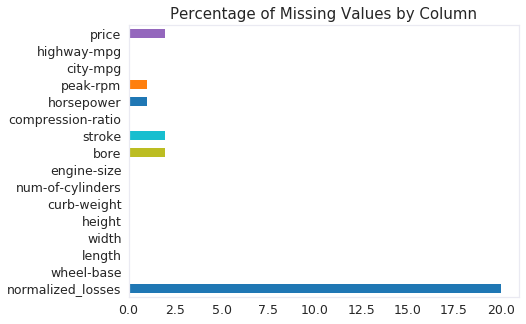

In [18]:
cars.isnull().sum().apply(lambda x: x / cars.shape[0] * 100).plot(kind='barh', figsize=(7,5));
plt.title('Percentage of Missing Values by Column');

The **normalized_losses** column indicates an average insurance loss for that particular car.  I don't think this will factor into the initial price of the car, and it is missing quite a bit of data.  Dropping it.

In [19]:
cars.drop('normalized_losses', inplace=True, axis=1)

For the remaining missing data, let's use a simple mean imputation to fill in the values.

In [20]:
imp = Imputer(strategy='mean')

In [21]:
cars['price'] = imp.fit_transform(cars[['price']])
cars['peak-rpm'] = imp.fit_transform(cars[['peak-rpm']])
cars['horsepower'] = imp.fit_transform(cars[['horsepower']])
cars['stroke'] = imp.fit_transform(cars[['stroke']])
cars['bore'] = imp.fit_transform(cars[['bore']])

In [22]:
cars.isnull().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No more empty values.

Now we need to normalize the data so that one particular column doesn't skew the prediction.  Excluding **price** as it is the target of our prediction.

In [23]:
for column in cars.columns: 
    if column != 'price':
        cars[column] = normalize(cars[[column]], axis=0)

In [24]:
cars.head()

,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.062544,0.067568,0.067892,0.063375,0.068241,0.061928,0.067995,0.072546,0.057234,0.057727,0.069554,0.067843,0.056303,0.059848,13495.0
1,0.062544,0.067568,0.067892,0.063375,0.068241,0.061928,0.067995,0.072546,0.057234,0.057727,0.069554,0.067843,0.056303,0.059848,16500.0
2,0.066709,0.068529,0.069374,0.068051,0.075606,0.092892,0.079502,0.056030,0.074105,0.057727,0.096499,0.067843,0.050941,0.057631,16500.0
3,0.070451,0.070690,0.070116,0.070518,0.062590,0.061928,0.057011,0.066692,0.072610,0.064141,0.063915,0.074627,0.064346,0.066498,13950.0
4,0.070168,0.070690,0.070328,0.070518,0.075633,0.077410,0.071133,0.066692,0.072610,0.051313,0.072061,0.074627,0.048260,0.048765,17450.0


In [25]:
def knn_train_test(train_cols, target_col, df, k_val=None):
    
    X = df[train_cols]
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    
    if k_val:
        knn = KNeighborsRegressor(n_neighbors=k_val)
    else:
        knn = KNeighborsRegressor()
        
    knn.fit(X_train, y_train)
    
    prediction = knn.predict(X_test)
    
    return mean_squared_error(y_test, prediction) ** .5

In [26]:
test_cols = list(cars.columns)
test_cols.remove('price')

In [27]:
rmse_list = []

In [28]:
for col in test_cols:
    rmse = knn_train_test([col], 'price', cars)
    rmse_list.append(rmse)

In [29]:
univ_rmse = pd.DataFrame({'Feature': test_cols, 'RMSE': rmse_list})
univ_rmse.sort_values('RMSE', inplace=True)

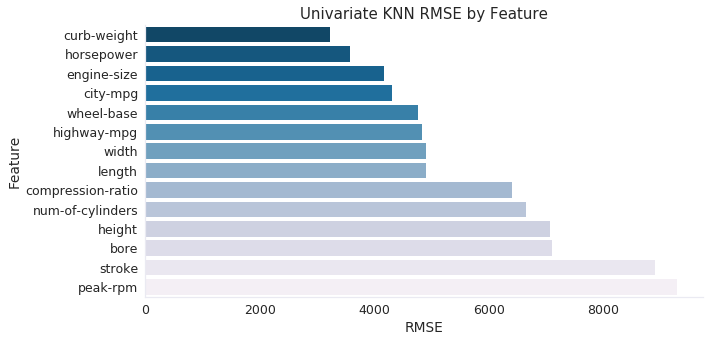

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='RMSE', 
            y='Feature', 
            data=univ_rmse, 
            palette=sns.color_palette("PuBu_r", univ_rmse.shape[0])
           ).set_title('Univariate KNN RMSE by Feature');
sns.despine()

In [31]:
k_vals = list(range(1,11,2))
k_val_test = [test_cols]

In [32]:
for val in k_vals:
    
    rmse_list = []
    
    for col in test_cols:
        rmse = knn_train_test([col], 'price', cars, val)
        rmse_list.append(rmse)  
        
    k_val_test.append(rmse_list)
        

In [33]:
k_val_df = pd.DataFrame({'Feature': k_val_test[0],
                         'n1': k_val_test[1],
                         'n3': k_val_test[2],
                         'n5': k_val_test[3],
                         'n7': k_val_test[4],
                         'n9': k_val_test[5]})

In [34]:
k_val_df = k_val_df.melt('Feature', var_name='cols',  value_name='vals')
k_val_df['vals'] = k_val_df['vals'].astype('float')

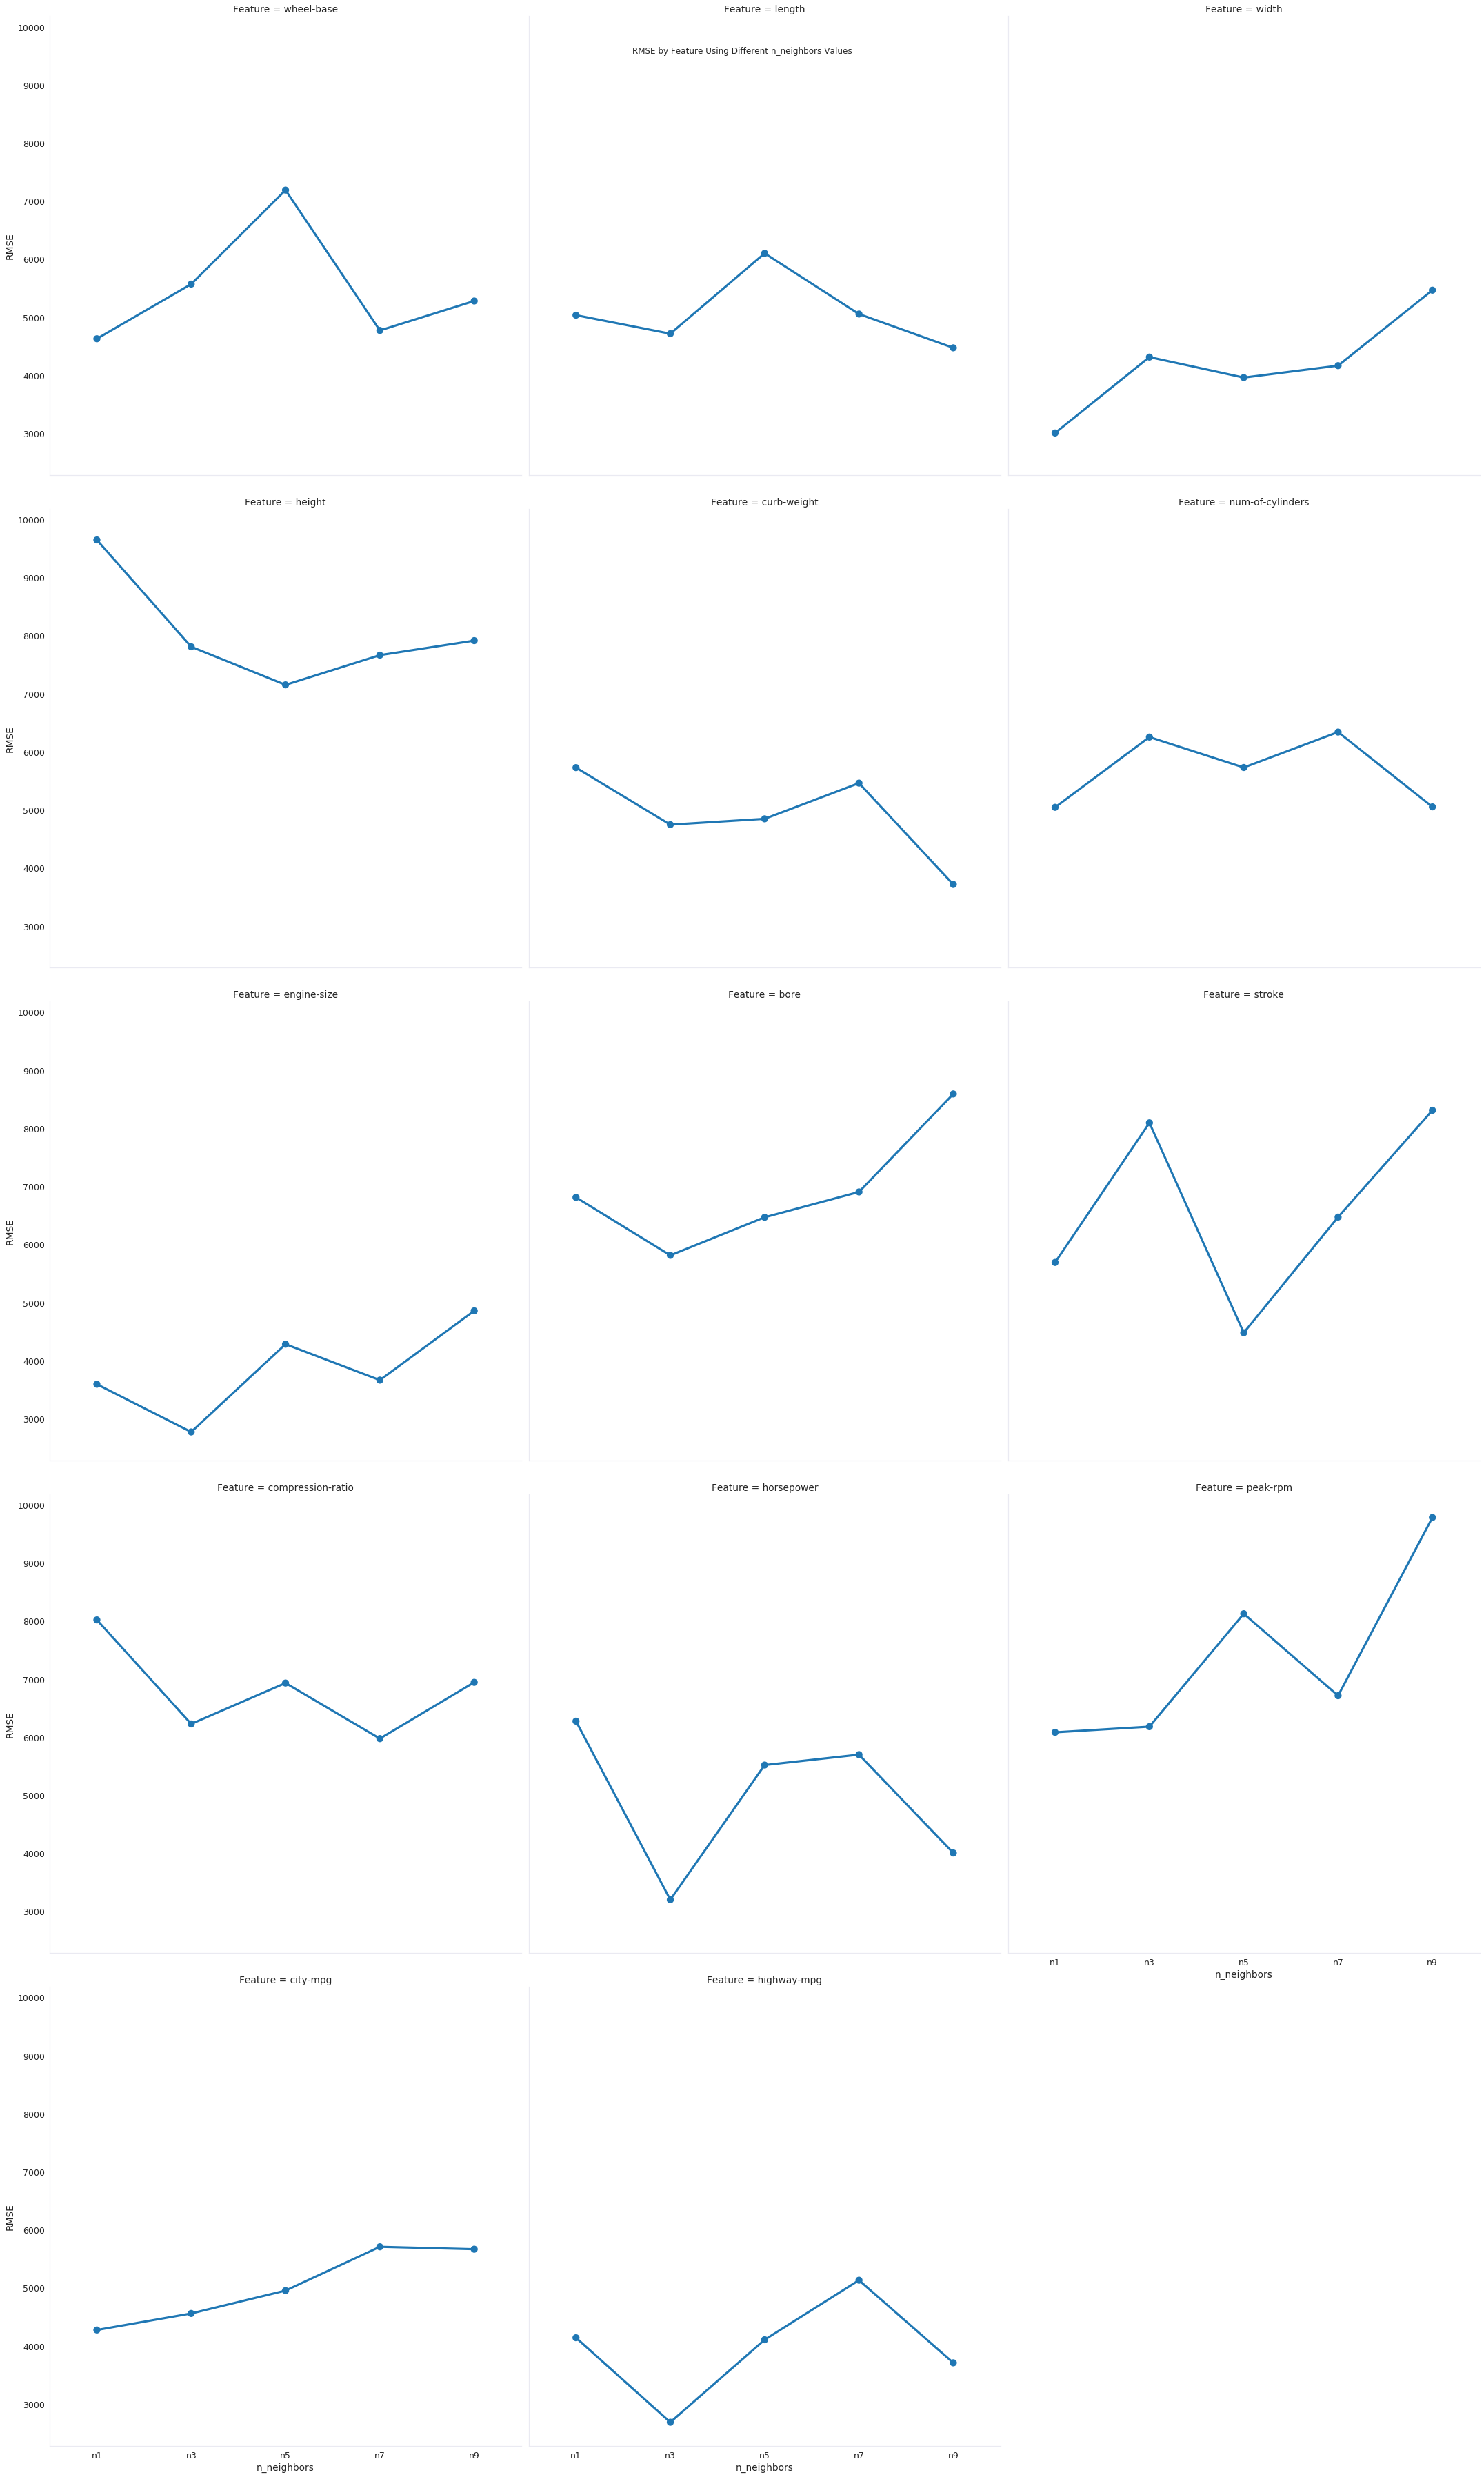

In [35]:
g = sns.factorplot(x="cols", y="vals",data=k_val_df, col='Feature', col_wrap=3, size=10)
g.set_xlabels('n_neighbors')
g.set_ylabels('RMSE')
g.fig.suptitle('RMSE by Feature Using Different n_neighbors Values');

In [36]:
knn_train_test(['curb-weight', 'horsepower'], 'price', cars)

5297.6480724783805

In [37]:
knn_train_test(['curb-weight', 'horsepower', 'engine-size'], 'price', cars)

2726.477921330737

In [38]:
knn_train_test(['curb-weight', 'horsepower', 'engine-size', 'highway-mpg'], 'price', cars)

4152.791867587237

In [39]:
knn_train_test(['curb-weight', 'horsepower', 'engine-size', 'highway-mpg', 'wheel-base'], 'price', cars)

3764.572731901912

In [40]:
lg_k_vals = list(range(1,26))

In [41]:
best_1 = ['curb-weight', 'horsepower', 'engine-size', 'highway-mpg']
best_2 = ['curb-weight', 'horsepower']
best_3 = ['curb-weight', 'horsepower', 'engine-size']
best_1_rmse = []
best_2_rmse = []
best_3_rmse = []

In [42]:
for val in lg_k_vals:
      
    rmse = knn_train_test(best_1, 'price', cars, val)       
    best_1_rmse.append(rmse)

In [43]:
for val in lg_k_vals:
      
    rmse = knn_train_test(best_2, 'price', cars, val)       
    best_2_rmse.append(rmse)

In [44]:
for val in lg_k_vals:
      
    rmse = knn_train_test(best_3, 'price', cars, val)       
    best_3_rmse.append(rmse)

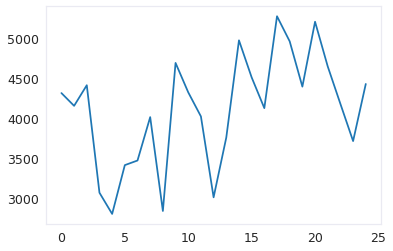

In [45]:
plt.plot(best_1_rmse)


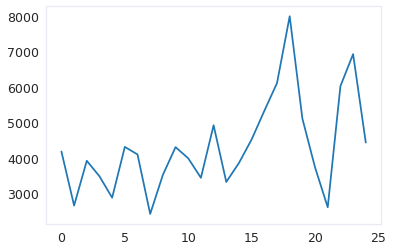

In [46]:
plt.plot(best_2_rmse)

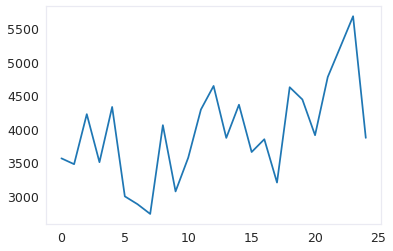

In [47]:
plt.plot(best_3_rmse)

In [48]:
def knn_fold_train_test(train_cols, target_col, df, folds, k_val=None):

    kf = KFold(folds, shuffle=True, random_state=1)
 
    if k_val:
        model = KNeighborsRegressor(n_neighbors=k_val)
    else:
        model = KNeighborsRegressor()
   
    mses = cross_val_score(model, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
 
    return rmses

In [50]:
knn_fold_train_test(best_1, 'price', cars, 10, 5).mean()

3169.0063326151485